In [28]:
import numpy as np
import pandas as pd

import os, sys
import random
import sklearn

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [29]:
flip_probs = [0.2, 0.2, 0.3, 0.5, 0.6]
mushrooms_data = data.MushroomsDataProvider(resample=True, flip_probs=flip_probs, annotate_prob=0.7)

3916
4208


Iter 00, logit: -2.870193
Iter 20, logit: -2.683399
Iter 40, logit: -2.679329
Iter 60, logit: -2.677390
Iter 80, logit: -2.676118
[0.42719834 0.57280166]
---------------
Label accuracy is 0.819664563779043
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.783145
Iter 20, logit: -2.318349
Iter 40, logit: -2.315627
Iter 60, logit: -2.315521
Iter 80, logit: -2.315516
(6499, 57)
Classifier train accuracy is 0.8685951684874597
(1625, 57)
Classifier test accuracy is 0.9735384615384616
Label accuracy is 0.9139867671949531
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.819235
Average Raykar weight is 0.4303678574335166
Iter 20, logit: -2.500430
Average Raykar weight is 0.3798843540581805
Iter 40, logit: -2.489436
Average Raykar weight is 0.37163337296194265
Iter 60, logit: -2.474963
Average Raykar weight is 0.3563005199768945
Iter 80, logit: -2.466890
Average Raykar weight is 0.34495471928296206
Average Raykar

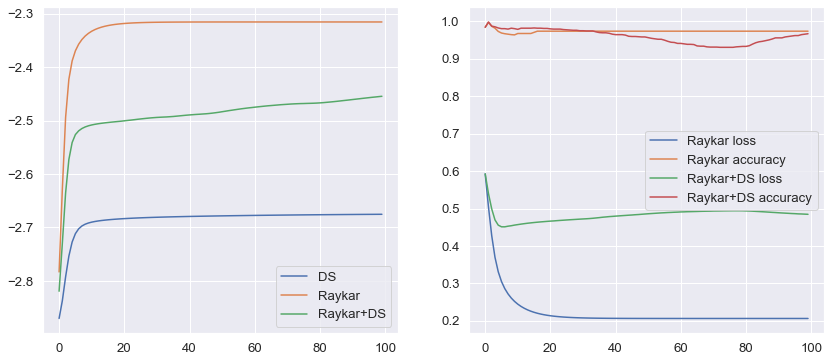

In [33]:
reload_all()
# 0.918
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=1)
bm.print_conf(mushrooms_methods)

Number of data points: 6499


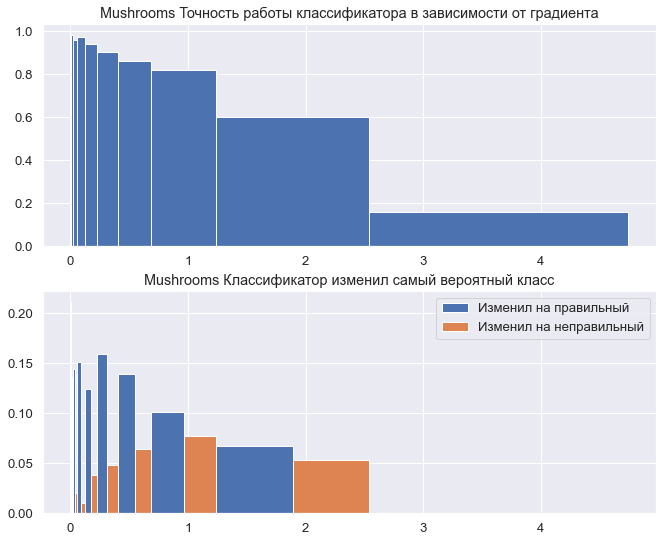

In [31]:
reload_all()
buckets, confidences, wrong, correct = bm.build_grad_hist(mushrooms_data, mushrooms_methods, mushroom_points, 'Mushrooms', 700)
condidence_mushrooms = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -2.870193
Iter 20, logit: -2.683399
Iter 40, logit: -2.679329
Iter 60, logit: -2.677390
Iter 80, logit: -2.676118
[0.42719834 0.57280166]
---------------
Label accuracy is 0.819664563779043
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.827365
Iter 20, logit: -2.334656
Iter 40, logit: -2.318644
Iter 60, logit: -2.316129
Iter 80, logit: -2.315642
(6499, 57)
Classifier train accuracy is 0.8685951684874597
(1625, 57)
Classifier test accuracy is 0.9735384615384616
Label accuracy is 0.9139867671949531
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.834672
Average Raykar weight is 0.7431165256303719
Iter 20, logit: -2.390049
Average Raykar weight is 0.7428038882120802
Iter 40, logit: -2.387821
Average Raykar weight is 0.7417782370185175
Iter 60, logit: -2.387859
Average Raykar weight is 0.7414991008059443
Iter 80, logit: -2.387780
Average Raykar weight is 0.7414729429355028
Average Raykar w

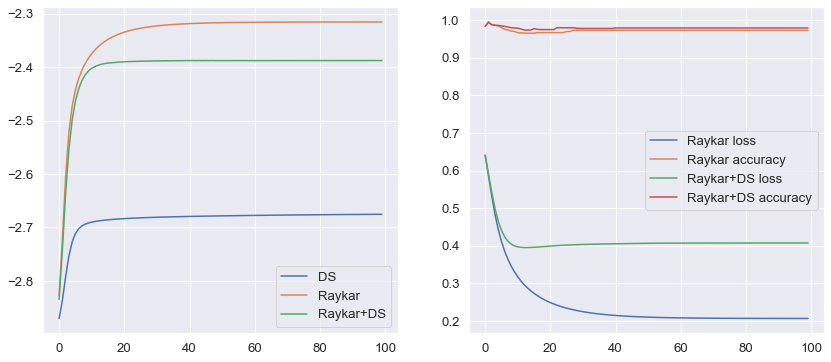

In [32]:
reload_all()
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=0.5, 
                                                                           confidence_estimator=condidence_mushrooms)
bm.print_conf(mushrooms_methods)

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Mushrooms')

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_r', 'Mushrooms')

In [ ]:
bm.plots_for_point(mushroom_points, mushrooms_data, mushrooms_methods, 6439)

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[2][1])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

In [ ]:
def scatter_cls(pts):
    print(len(pts))
    am = np.array(list(map(lambda x: np.argmax(x), pts['classifier_r'])))
    r = np.array(list(map(lambda x: x.max(), pts['classifier_r'])))
    rds = np.array(list(map(lambda x: x.max(), pts['classifier_rds'])))
    r, rds = [], []
    for arg, x in zip(am, pts['classifier_r']):
        r.append(x[arg])
    for arg, x in zip(am, pts['classifier_rds']):
        rds.append(x[arg])
#     plt.scatter(r, rds)
    r = np.array(r)
    rds = np.array(rds)
    plt.hist(r * rds)
    
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])])

In [ ]:
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])

In [ ]:
res = []
for _, row in mushroom_points.iterrows():
    res.append(row.conf_mx_r + np.log(row.classifier_r) + np.log(row.classifier_rds))
res = np.array(res)
res = np.exp(res)
res = sklearn.preprocessing.normalize(res, axis=1, norm='l1')

estimates = {}
for i, row in mushroom_points.iterrows():
    estimates[row['task']] = mushrooms_methods[2].values[np.argmax(res[i])]

In [ ]:
all_points = 0
accepted = 0

for point in mushrooms_data.gold():
    if point.task in estimates:
        estimate = estimates[point.task]
        all_points += 1
        if point.value == estimate:
            accepted += 1

accuracy = accepted / all_points

In [ ]:
accuracy

In [ ]:
reload_all()
method = rb.RaykarWithBoosting()
method.fit(mushrooms_data.labels(), mushrooms_data.features(), max_iter=50)

In [ ]:
mushrooms_methods[-1].classifiers[0].w

In [ ]:
mushrooms_methods[-1].classifiers[1].w

In [ ]:
mushroom_points

In [ ]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])][:20]

In [ ]:
reload_all()

bm.boosting_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms', metric='minmax')  

In [ ]:
scatter_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                          mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])  

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [ ]:
mushrooms_data._features

In [ ]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])]

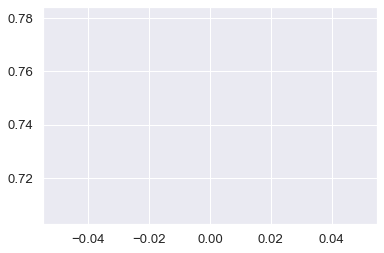

In [20]:
plt.plot(mushrooms_methods[2].accuracies)

In [21]:
mushrooms_methods[2].accuracies

[0.7433846153846154]

In [23]:
x, y = mushrooms_data.test()

In [27]:
(y == '2').mean()

0.312